In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("titanic_data.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


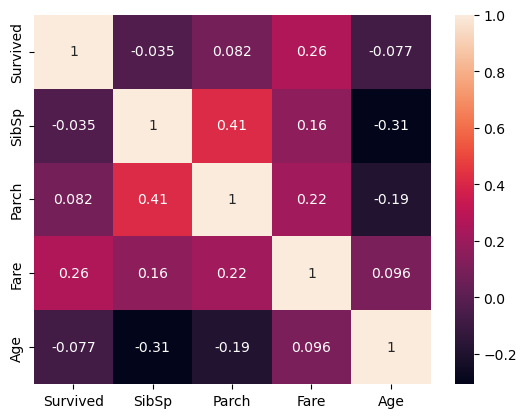

In [13]:
heatmap = sns.heatmap(df[["Survived" , "SibSp" , "Parch" , "Fare" ,"Age"]].corr() , annot = True)

In [14]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


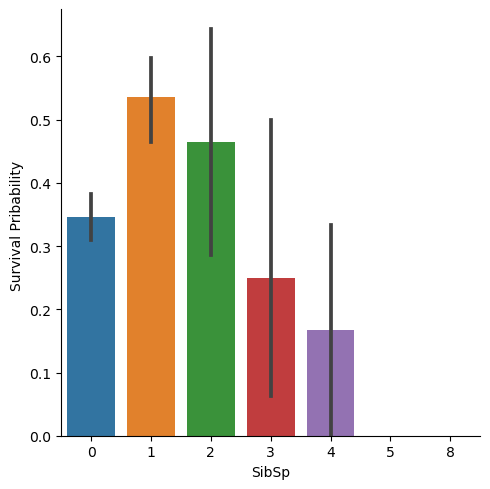

In [18]:
sns.catplot(x ="SibSp" , y ="Survived" , data = df , kind = "bar" ).set_ylabels("Survival Pribability " )

C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\anant\anaconda3\Lib\s

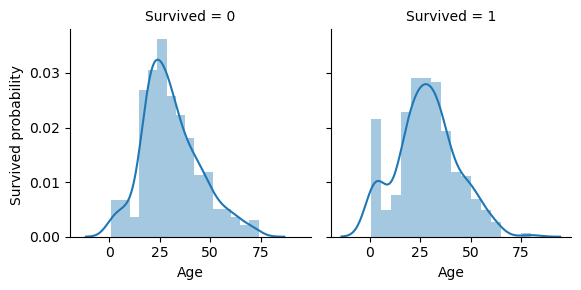

In [20]:
age_visual = sns.FacetGrid(df , col = "Survived" )
age_visual = age_visual.map(sns.distplot , "Age").set_ylabels("Survived probability ")

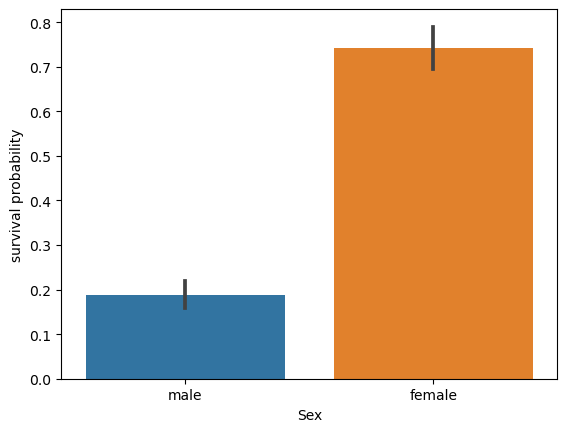

In [21]:
age_plot = sns.barplot(x = "Sex" , y = "Survived" , data = df ).set_ylabel("survival probability")

In [23]:
df[["Sex" , "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


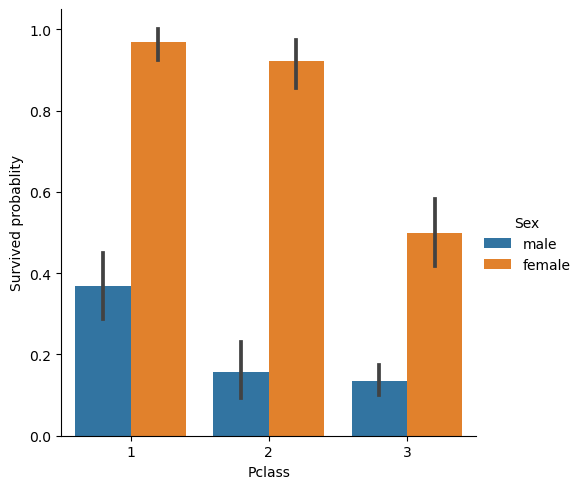

In [26]:
class_map = sns.catplot(x = "Pclass" , y ="Survived" , data = df , kind = "bar" , hue = "Sex").set_ylabels("Survived probablity")


In [27]:
df["Embarked"].isnull().sum()

2

In [28]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
df["Embarked"] = df["Embarked"].fillna("S")

C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


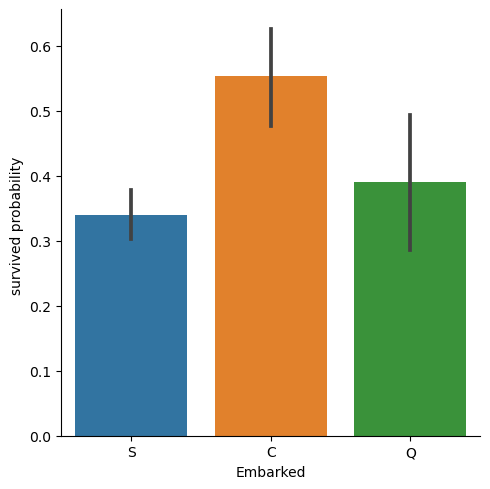

In [30]:
embar = sns.catplot(x = "Embarked" , y = "Survived" , data = df , kind ="bar").set_ylabels("survived probability ")

C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


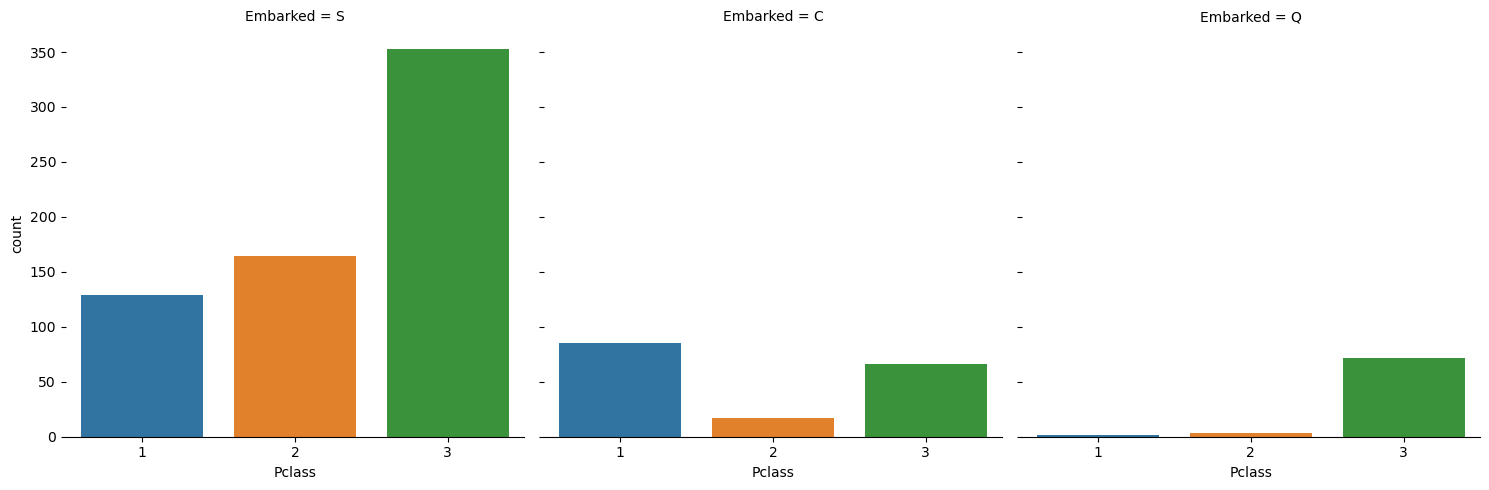

In [32]:
g = sns.catplot(x = "Pclass" , col = "Embarked" , data = df , kind = "count" )
g.despine(left =True)
g = g.set_ylabels("count")

C:\Users\anant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


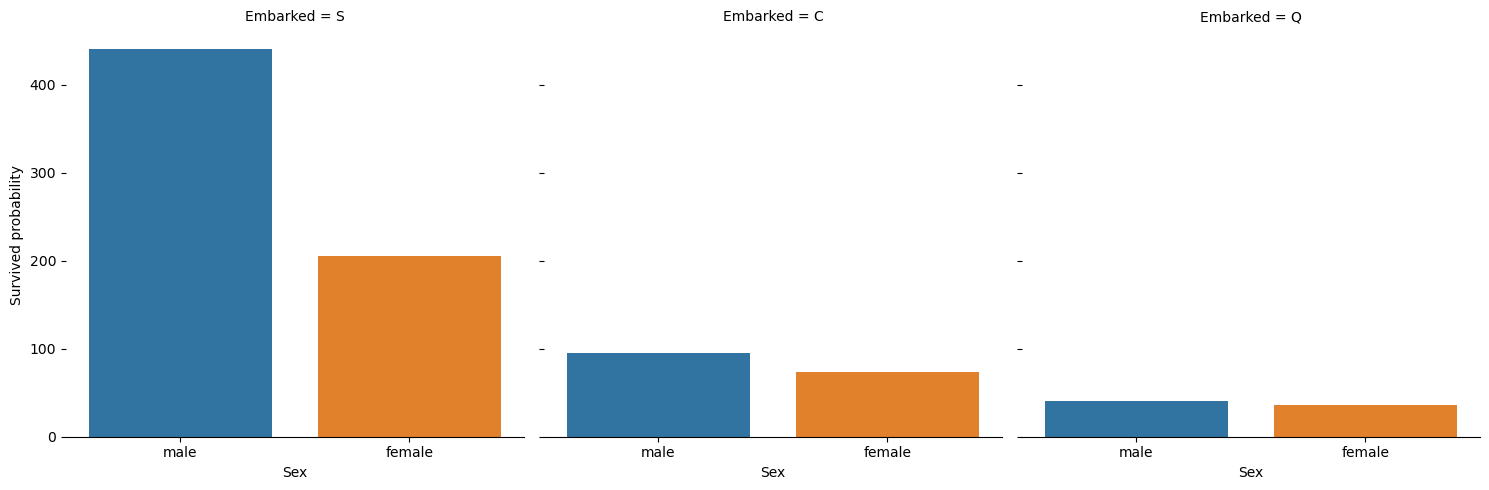

In [33]:
g = sns.catplot(x = "Sex" , col = "Embarked" , data = df , kind = "count")
g.despine(left = True)
g = g.set_ylabels("Survived probability ")

In [35]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()

In [36]:
rand_age = np.random.randint(mean-std , mean+std , size = is_null)

In [38]:
a = df["Age"].copy()
a[np.isnan(a)] = rand_age
df["Age"] = a

In [39]:
df["Age"].isnull().sum()

0

In [40]:
df["Embarked"] = df["Embarked"].fillna("S")

In [41]:
col_to_drop = ["PassengerId" , "Cabin" , "Ticket" , "Name"]
df.drop(col_to_drop , axis =1 , inplace = True )

In [42]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
genders = {"male": 0 , "female" : 1}
df["Sex"] = df["Sex"].map(genders)

In [44]:
ports = {"S" : 0 , "C" : 1 , "Q" : 2}
df["Embarked"] = df["Embarked"].map(genders)

In [45]:
x = df.drop(df.columns[[0]] , axis = 1 )
y = df["Survived"]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state= 0) 

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test = sc_x.fit(x_test)

C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\anant\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in

In [52]:
logreg =  LogisticRegression()
svc_cla = SVC()
dt_class = DecisionTreeClassifier()
knn_cla = KNeighborsClassifier()
rf_cla = RandomForestClassifier(n_estimators=1000)

In [53]:
logreg.fit(x_train , y_train)
svc_cla.fit(x_train , y_train)
dt_class.fit(x_train , y_train)
knn_cla.fit(x_train , y_train)
rf_cla.fit(x_train , y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values